## Individual household electric power consumption
#### https://archive.ics.uci.edu/dataset/484/travel+reviews

#Additional Variable Information
Atributes represent average user feedback


In [52]:
import pandas as pd 
import numpy as np
from pathlib import Path
print()
Travel_Reviews = pd.read_csv(f'{Path.cwd()}/tripadvisor_review.csv'
            , delimiter=',')


### This data set is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories mentioned across East Asia are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.

In [53]:
Travel_Reviews

,User ID,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks_spots,beaches,theaters,religious_institutions
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [49]:
# Travel_Reviews = Travel_Reviews[~(Travel_Reviews['theaters'] <= 1)]  
# Travel_Reviews = Travel_Reviews.sort_values('theaters')

In [125]:


import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

revs_X = np.array([float(i) for i in Travel_Reviews['theaters']])
random_noise  = []
for Xs in revs_X:
    random_val = np.random.uniform(0.01, 0.70)
    random_noise += [random_val] 
revs_y  = 0.9 * revs_X + random_noise
revs_y = np.array([float(i) for i in revs_y])
revs_X = np.reshape(revs_X, (-1, 1))
revs_y = np.reshape(revs_y, (-1, 1))


In [126]:
print(len(revs_y), max(revs_y), ' ', revs_y)

980 [3.4639508]   [[2.16352928]
 [2.34006784]
 [1.19422456]
 [1.55766726]
 [1.66781331]
 [2.06831818]
 [1.23016562]
 [2.00411299]
 [1.43907376]
 [2.07875534]
 [2.00297351]
 [1.5394249 ]
 [1.84450295]
 [2.6198377 ]
 [1.85245403]
 [1.96123478]
 [1.43300798]
 [1.09586996]
 [2.29471511]
 [1.71544161]
 [1.64067576]
 [1.66677346]
 [1.59993827]
 [2.18556048]
 [1.90048942]
 [2.05687635]
 [1.49522826]
 [1.32361248]
 [2.15384064]
 [1.55551813]
 [1.94255853]
 [1.39312464]
 [1.66673771]
 [1.76083195]
 [2.30989347]
 [1.53638713]
 [1.93591032]
 [2.0038231 ]
 [1.9876176 ]
 [1.81136425]
 [1.39390523]
 [1.82845913]
 [1.27301562]
 [2.49318244]
 [1.87413413]
 [1.97072381]
 [2.31209277]
 [1.69196279]
 [1.77225503]
 [1.20173928]
 [1.30577   ]
 [1.90979339]
 [1.88387571]
 [1.42888656]
 [1.90781877]
 [1.61667855]
 [1.48013225]
 [1.81431668]
 [1.98813601]
 [1.502222  ]
 [1.78296153]
 [1.52061731]
 [2.15045403]
 [1.4921213 ]
 [1.77633064]
 [1.98358976]
 [1.14988246]
 [1.34227845]
 [1.43694528]
 [1.79027782]
 [

In [127]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [129]:
# Shuffle data
X = revs_X
y = revs_y
NUM_SAMPLES = len(Travel_Reviews['theaters'])
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [130]:
# Split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [131]:
# Split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (686, 1), y_train: (686, 1)
X_val: (147, 1), y_test: (147, 1)
X_test: (147, 1), y_test: (147, 1)


In [132]:
def normalize_data(data, mean, std):
    return (data - mean)/std

In [133]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [134]:
# Standardize
X_train = normalize_data(X_train, X_mean, X_std)
y_train = normalize_data(y_train, y_mean, y_std)
X_val = normalize_data(X_val, X_mean, X_std)
y_val = normalize_data(y_val, y_mean, y_std)
X_test = normalize_data(X_test, X_mean, X_std)
y_test = normalize_data(y_test, y_mean, y_std)

In [135]:

# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.1, std: 0.9
mean: -0.2, std: 0.9


In [136]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional
print(INPUT_DIM, OUTPUT_DIM)

1 1


In [140]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


In [142]:

# Forward pass [NX1] · [1X1] = [NX1]
y_pred = np.dot(X_train, W) + b
print (f"y_pred: {y_pred.shape}")

y_pred: (686, 1)


In [143]:
# Loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print (f"loss: {loss:.2f}")

loss: 0.99


In [144]:
# Backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

In [145]:
LEARNING_RATE = 1e-1

In [146]:

# Update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

In [147]:
NUM_EPOCHS = 100

In [148]:
def gd():
    # Initialize random weights
    W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
    b = np.zeros((1, ))

    # gradient descent
    # Training loop
    for epoch_num in range(NUM_EPOCHS):
        # Forward pass [NX1] · [1X1] = [NX1]
        y_pred = np.dot(X_train, W) + b

        # Loss
        loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

        # Show progress
        if epoch_num%10 == 0:
            print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

        # Backpropagation
        dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
        db = -(2/N) * np.sum((y_train - y_pred) * 1)

        # Update weights
        W += -LEARNING_RATE * dW
        b += -LEARNING_RATE * db

    return W, b

In [149]:
def sgd():
    # Initialize random weights
    W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
    b = np.zeros((1, ))

    # stochastic gradient descent
    # Training loop
    batch_size = 20
    train_xy = np.append(X_train, y_train, axis=1)


    for epoch_num in range(NUM_EPOCHS):
        # shuffle
        np.random.shuffle(train_xy)

        for start in range(0, N, batch_size):
            stop = start + int(batch_size / 2)
            # print(f'{start}, {stop}, {batch_size}')
            x_batch, y_batch = train_xy[start:stop, :-1], train_xy[start:stop, -1:]
            #x_batch, y_batch = X_train[start:stop], y_train[start:stop]


            y_pred = np.dot(x_batch, W) + b
            loss = (1 / len(y_batch)) * np.sum((y_batch - y_pred) ** 2)

            dW = -(2 / batch_size) * np.sum((y_batch - y_pred) * x_batch)
            db = -(2 / batch_size) * np.sum((y_batch - y_pred) * 1)

            # Update weights
            W += -LEARNING_RATE * dW
            b += -LEARNING_RATE * db
        # Show progress
        if epoch_num % 10 == 0:
            print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    return W, b

In [150]:
def sgd_momentum(decay_rate=0.0):
    # Initialize random weights
    W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
    b = np.zeros((1, ))

    # stochastic gradient descent
    # Training loop
    batch_size = 10
    train_xy = np.append(X_train, y_train, axis=1)


    for epoch_num in range(NUM_EPOCHS):
        # shuffle
        np.random.shuffle(train_xy)

        for start in range(0, N, batch_size):
            stop = start + batch_size
            # print(f'{start}, {stop}, {batch_size}')
            x_batch, y_batch = train_xy[start:stop, :-1], train_xy[start:stop, -1:]
            #x_batch, y_batch = X_train[start:stop], y_train[start:stop]


            y_pred = np.dot(x_batch, W) + b
            loss = (1 / len(y_batch)) * np.sum((y_batch - y_pred) ** 2)

            dW = -(2 / batch_size) * np.sum((y_batch - y_pred) * x_batch)
            db = -(2 / batch_size) * np.sum((y_batch - y_pred) * 1)

            # Update weights
            W += decay_rate * dW - LEARNING_RATE * dW
            b += decay_rate * db - LEARNING_RATE * db
        # Show progress
        if epoch_num % 10 == 0:
            print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    return W, b

Gradient descent
Epoch: 0, loss: 0.966
Epoch: 10, loss: 0.284
Epoch: 20, loss: 0.276
Epoch: 30, loss: 0.276
Epoch: 40, loss: 0.276
Epoch: 50, loss: 0.276
Epoch: 60, loss: 0.276
Epoch: 70, loss: 0.276
Epoch: 80, loss: 0.276
Epoch: 90, loss: 0.276
W: [[0.85092571]]; b: [3.2665804e-16];
train_MSE: 0.28, test_MSE: 0.29


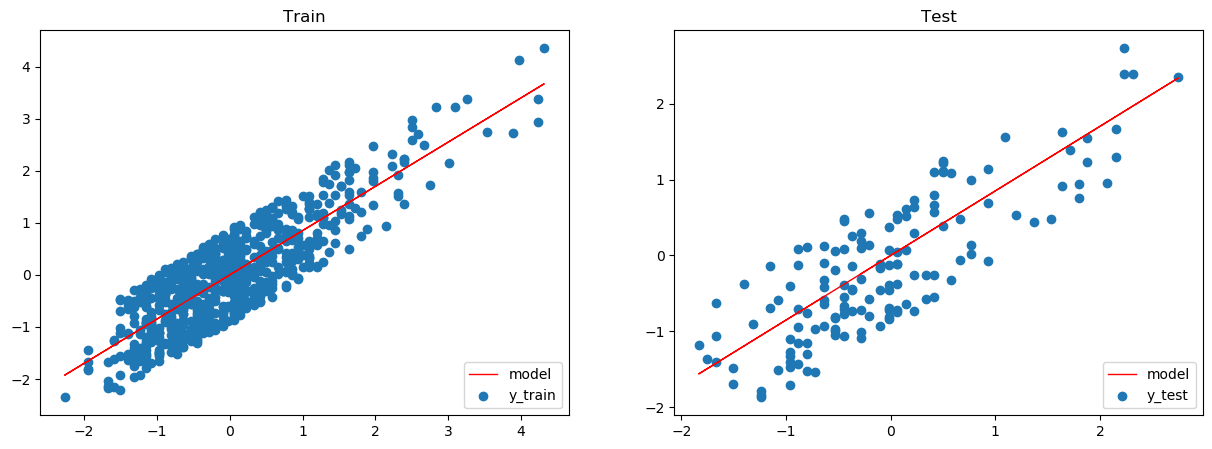

Stochastic gradient descent
Epoch: 0, loss: 0.336
Epoch: 10, loss: 0.394
Epoch: 20, loss: 0.300
Epoch: 30, loss: 0.302
Epoch: 40, loss: 0.190
Epoch: 50, loss: 0.310
Epoch: 60, loss: 0.371
Epoch: 70, loss: 0.168
Epoch: 80, loss: 0.310
Epoch: 90, loss: 0.202
W: [[0.85117265]]; b: [0.01127091];
train_MSE: 0.28, test_MSE: 0.29


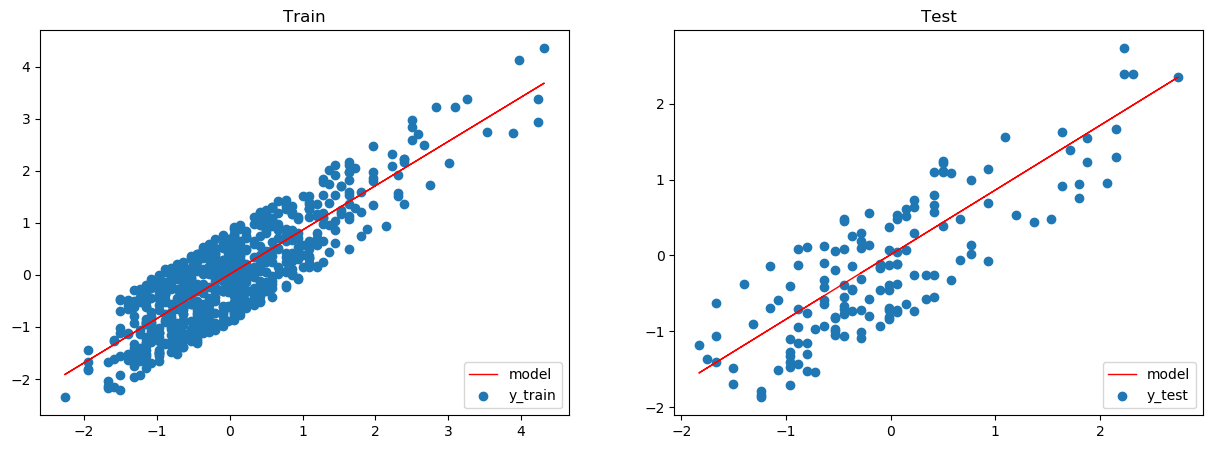

Stochastic gradient descent with momentum
Epoch: 0, loss: 0.309
Epoch: 10, loss: 0.376
Epoch: 20, loss: 0.157
Epoch: 30, loss: 0.212
Epoch: 40, loss: 0.163
Epoch: 50, loss: 0.384
Epoch: 60, loss: 0.309
Epoch: 70, loss: 0.411
Epoch: 80, loss: 0.331
Epoch: 90, loss: 0.467
W: [[0.87831656]]; b: [-0.01045848];
train_MSE: 0.28, test_MSE: 0.29


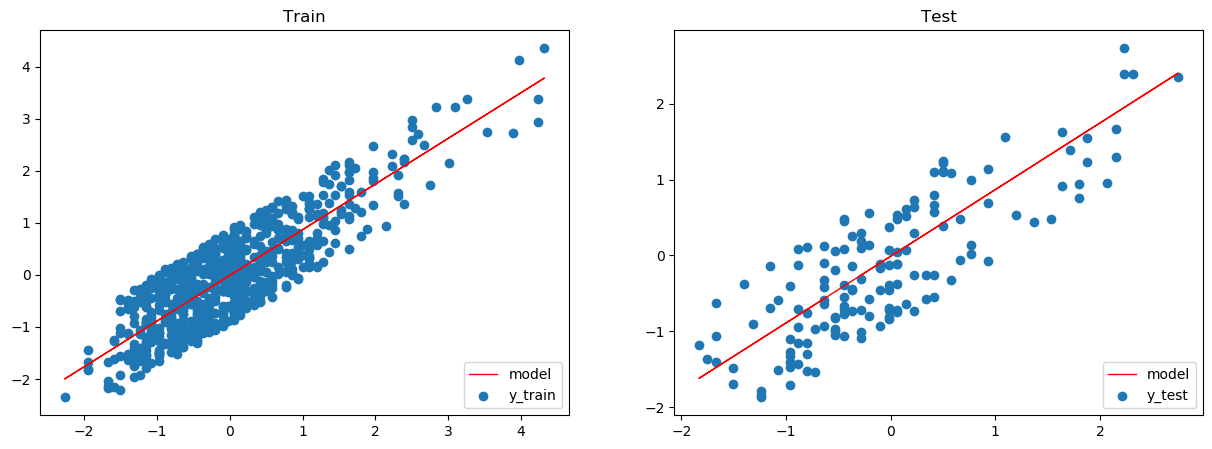

In [151]:
def evaluation(W, b):
    print(f'W: {W}; b: {b};')
    # Predictions 
    pred_train = W * X_train + b
    pred_test = W * X_test + b

    # Train and test MSE
    train_mse = np.mean((y_train - pred_train) ** 2)
    test_mse = np.mean((y_test - pred_test) ** 2)
    print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

    # Figure size
    plt.figure(figsize=(15,5))

    # Plot train data
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plt.scatter(X_train, y_train, label="y_train")
    plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
    plt.legend(loc="lower right")

    # Plot test data
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plt.scatter(X_test, y_test, label='y_test')
    plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
    plt.legend(loc="lower right")

    # Show plots
    plt.show()

print('Gradient descent')
W, b = gd()
evaluation(W, b)

print('Stochastic gradient descent')
W, b = sgd()
evaluation(W, b)

print('Stochastic gradient descent with momentum')
W, b = sgd_momentum(0.01)
evaluation(W, b)

In [155]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 0.9X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}") 

[actual] y = 0.9X + noise
[model] y_hat = 0.9X + 0.3


Coefficients: 
 [[0.84644664]]
Mean squared error: 0.03
Coefficient of determination: 0.70


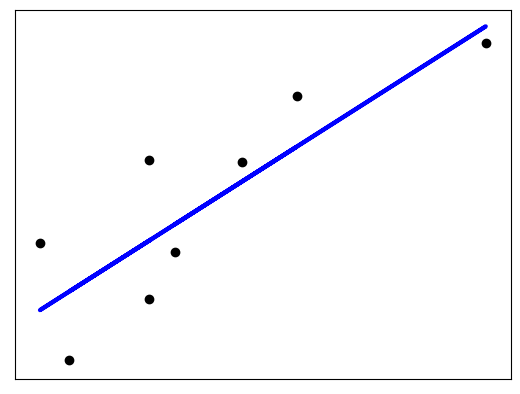

In [156]:

# revs_X = revs_X[:, np.newaxis, 2]

# Use only one feature

# Split the data into training/testing sets
revs_X_train = revs_X[:60]
revs_X_test = revs_X[60:68]
revs_X_test
# Split the targets into training/testing sets
revs_y_train = revs_y[:60]
revs_y_test = revs_y[60:68]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(revs_X_train, revs_y_train)

# Make predictions using the testing set
revs_y_pred = regr.predict(revs_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(revs_y_test, revs_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(revs_y_test, revs_y_pred))

# Plot outputs
plt.scatter(revs_X_test, revs_y_test, color="black")
plt.plot(revs_X_test, revs_y_pred, color="blue", linewidth=3)
# plt.xlim((-10, 30))                                                                                                            
# plt.ylim((230, 240))
plt.xticks(())
plt.yticks(())

plt.show()


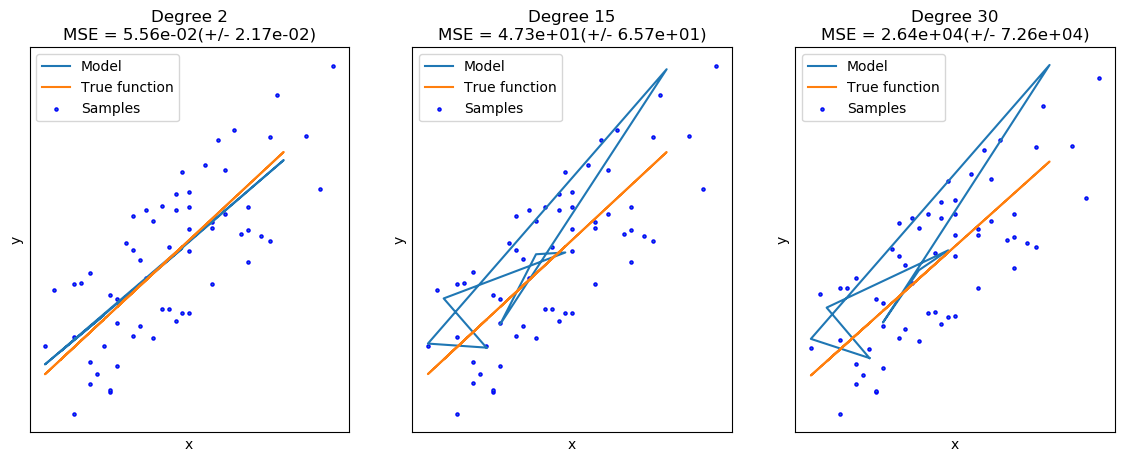

In [170]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return W_unscaled[0][0] * X + b_unscaled[0]

np.random.seed(0)

n_samples = 20
degrees = [2, 15, 30]

# X = np.sort(np.random.rand(n_samples))
# y = true_fun(revs_X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(revs_X_train, revs_y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, revs_X_train, revs_y_train, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(revs_X_test, pipeline.predict(revs_X_test), label="Model")
    plt.plot(revs_X_test, true_fun(revs_X_test), label="True function")
    plt.scatter(revs_X_train, revs_y_train, edgecolor="b", s=5, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    # plt.xlim((-10, 30))                                                                                                            
    # plt.ylim((230, 250))    
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )           
plt.show()

In [171]:
from sklearn.preprocessing import PolynomialFeatures as poly
rand_cols = Travel_Reviews.sample(1)
rand_theater_col = rand_cols['museums'].to_list()
print(f'{rand_theater_col} \n {rand_cols}')



[0.42] 
       User ID  art_galleries  dance_clubs  juice_bars  restaurants  museums  \
440  User 441           0.93         1.28        0.93         0.46     0.42   

     resorts  parks_spots  beaches  theaters  religious_institutions  
440      1.5         3.18      2.7      1.86                    2.98  


In [68]:
# print(linear_regression.predict(poly.fit_transform(X, [rand_theater_col]))
# )

TypeError: wrapped() missing 1 required positional argument: 'X'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(revs_X_train) 
X_poly

array([[ 1.    ,  2.24  ,  5.0176],
       [ 1.    ,  2.3   ,  5.29  ],
       [ 1.    ,  2.02  ,  4.0804],
       [ 1.    ,  2.02  ,  4.0804],
       [ 1.    ,  2.05  ,  4.2025],
       [ 1.    ,  2.18  ,  4.7524],
       [ 1.    ,  2.08  ,  4.3264],
       [ 1.    ,  2.05  ,  4.2025],
       [ 1.    ,  2.14  ,  4.5796],
       [ 1.    ,  3.04  ,  9.2416],
       [ 1.    ,  2.27  ,  5.1529],
       [ 1.    ,  2.24  ,  5.0176],
       [ 1.    ,  2.46  ,  6.0516],
       [ 1.    ,  2.5   ,  6.25  ],
       [ 1.    ,  2.14  ,  4.5796],
       [ 1.    ,  2.37  ,  5.6169],
       [ 1.    ,  2.21  ,  4.8841],
       [ 1.    ,  2.08  ,  4.3264],
       [ 1.    ,  2.21  ,  4.8841],
       [ 1.    ,  2.18  ,  4.7524],
       [ 1.    ,  2.18  ,  4.7524],
       [ 1.    ,  2.18  ,  4.7524],
       [ 1.    ,  2.18  ,  4.7524],
       [ 1.    ,  2.05  ,  4.2025],
       [ 1.    ,  2.11  ,  4.4521],
       [ 1.    ,  2.69  ,  7.2361],
       [ 1.    ,  2.5   ,  6.25  ],
       [ 1.    ,  2.4   ,  5

In [ ]:
polyreg = LinearRegression() 
polyreg.fit(X_poly, revs_y_train) 

LinearRegression()

In [ ]:
y_pred_pr = polyreg.predict(poly.fit_transform(revs_X_train))
from sklearn.metrics import r2_score
print('R2 score for Polynomial Regression:',r2_score(revs_y_train,y_pred_pr))

R2 score for Polynomial Regression: 0.11861133523173795


In [ ]:
Travel_Reviews.sample(1)

,User ID,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks_spots,beaches,theaters,religious_institutions
134,User 135,0.51,1.64,0.27,0.3,0.78,1.86,3.17,2.69,2.5,3.34


In [ ]:
polyreg.predict(poly.fit_transform([[2.5]]))

array([1.60871018])

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([0.5, 0.5])